## Overview

# Importing libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data Loading

In [2]:
test = pd.read_csv('./Dataset/test.csv')
X_test = test.copy()

In [3]:
train = pd.read_csv('./Dataset/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Visualization

## <font color='orange' >Sex</font>

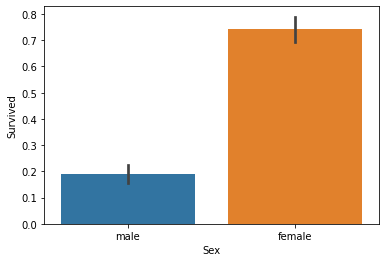

In [6]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.show()

In [7]:
# Pecenatage wise distribution

train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


### Conclusion 

Female have a higher chance of surviving compared to male

## <font color='orange' >PClass</font>

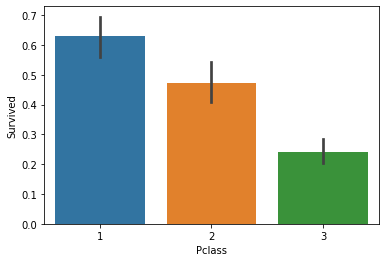

In [8]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

### Conclusion
Higher the class more the surviving chance

## <font color='orange' >Embarked</font>

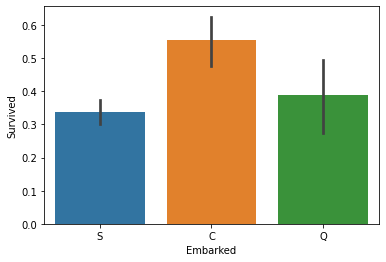

In [9]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.show()

### Conclusion
The people boarding from Cherbourg have higher surviving chances

## <font color='orange' >Fare Visualization</font>

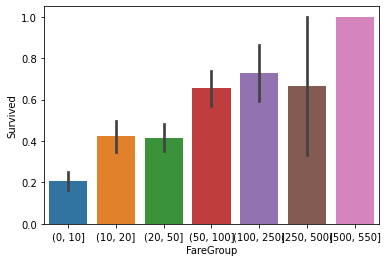

In [10]:
bins = [0,10,20,50,100,250,500,550]
train["FareGroup"]=pd.cut(train["Fare"],bins)

sns.barplot(x="FareGroup",y="Survived",data=train)
plt.show()

### Conclusion
Higher the fare a person pays more the surviving chance

## <font color='orange' >Age</font>

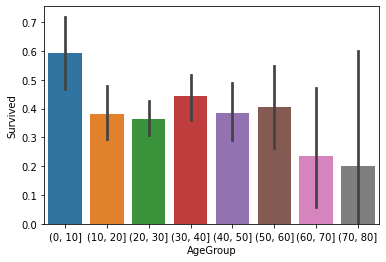

In [11]:
bins = [0,10,20,30,40,50,60,70,80]
train["AgeGroup"]=pd.cut(train["Age"],bins)

sns.barplot(x="AgeGroup",y="Survived",data=train)
plt.show()

### Conclusion
Younger people have more surviving chance

# Data Cleaning

In [12]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareGroup,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(0, 10]","(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(50, 100]","(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(0, 10]","(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(50, 100]","(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(0, 10]","(30.0, 40.0]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,"(0, 10]",NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50, 100]","(50.0, 60.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(20, 50]","(0.0, 10.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(10, 20]","(20.0, 30.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(20, 50]","(10.0, 20.0]"


In [13]:
# Dropping the features that are not important  

X_train = train.drop(['PassengerId','AgeGroup','Survived','Name', 'Ticket','Cabin','Parch','SibSp','FareGroup'], axis = 'columns')

X_test.drop(['PassengerId','Name', 'Ticket','Cabin','Parch','SibSp'], axis = 'columns',inplace= True)

In [14]:
X_test

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S
...,...,...,...,...,...
413,3,male,NaN,8.0500,S
414,1,female,39.0,108.9000,C
415,3,male,38.5,7.2500,S
416,3,male,NaN,8.0500,S


In [15]:
Y_train = train['Survived']

In [16]:
X_train

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
886,2,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
888,3,female,NaN,23.4500,S
889,1,male,26.0,30.0000,C


In [17]:
# checking for any NaN 

X_train.isna().any() ,Y_train.isna().any() , X_test.isna().any()

(Pclass      False
 Sex         False
 Age          True
 Fare        False
 Embarked     True
 dtype: bool,
 False,
 Pclass      False
 Sex         False
 Age          True
 Fare         True
 Embarked    False
 dtype: bool)

In [18]:
X_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# Replacing NaN in age & fare by its mean & embarked by majority

X_train['Age'].fillna(X_train['Age'].mean(), inplace = True)
X_train['Embarked'].fillna('S', inplace = True)

X_test['Age'].fillna(X_test['Age'].mean(),inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(),inplace=True)

In [20]:
X_test.isna().any()

Pclass      False
Sex         False
Age         False
Fare        False
Embarked    False
dtype: bool

In [21]:
# To convert Sex (Male/Female to 0/1) & Embarked (Q,C,S to 0,1,2)

from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [22]:
X_train['Gender'] = le.fit_transform(X_train['Sex']) 
X_train.drop(['Sex'],axis = 'columns',inplace=True)

embarked = { 'S': 0 , 'C': 1 , "Q":2}
X_train['Embarked'] = X_train['Embarked'].map(embarked)

X_test['Gender'] = le.fit_transform(X_test['Sex']) 
X_test.drop(['Sex'],axis = 'columns',inplace=True)

X_test['Embarked'] = X_test['Embarked'].map(embarked)

X_train.head(5), X_test.head(5)

(   Pclass   Age     Fare  Embarked  Gender
 0       3  22.0   7.2500         0       1
 1       1  38.0  71.2833         1       0
 2       3  26.0   7.9250         0       0
 3       1  35.0  53.1000         0       0
 4       3  35.0   8.0500         0       1,
    Pclass   Age     Fare  Embarked  Gender
 0       3  34.5   7.8292         2       1
 1       3  47.0   7.0000         0       0
 2       2  62.0   9.6875         2       1
 3       3  27.0   8.6625         0       1
 4       3  22.0  12.2875         0       0)


# Model Fitting


###  <font color='orange' >a. Logistic Regression</font>

In [23]:
# using Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [24]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [25]:
# Score on training data
clf.score(X_train,Y_train)

0.792368125701459

In [26]:
Y_test = clf.predict(X_test)

In [27]:
Y_test.shape

(418,)

In [28]:
#set index as PassengerId and predict survival 

index = test['PassengerId']
output = pd.DataFrame({ 'PassengerId' : index, 'Survived': Y_test })
output.to_csv('LogisticRegression_predictions.csv', index=False)

###  <font color='orange' >b. Random Forest</font>

In [29]:
# using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10 , max_depth = 5)

In [30]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [31]:
# cross val score to avoid overfitting 

from sklearn.model_selection import cross_val_score

In [32]:
score_list = []
for i in range(1,50):
    score_list.append(cross_val_score(RandomForestClassifier(n_estimators = i, max_depth = 5),X_train,Y_train).mean())

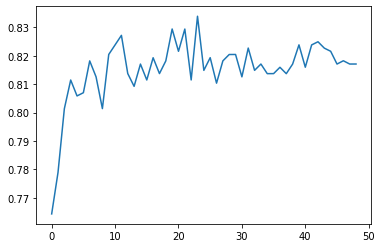

In [33]:
plt.plot(score_list)
plt.show()

In [34]:
cross_val_score(RandomForestClassifier(n_estimators = np.argmax(score_list), max_depth = 5),X_train,Y_train).mean()

0.8159625886636119

In [35]:
Y_test = rf.predict(X_test)

In [36]:
Y_test.shape

(418,)

In [37]:
final = pd.DataFrame({ 'PassengerId' : index, 'Survived': Y_test})

In [38]:
final.to_csv('RandomForest_predictions.csv', index=False)